In [70]:
import pandas as pd
import got3 as got
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import numpy as np

In [20]:
nfl_teams = {'Phoenix, AZ': 'Cardinals', 'Falcons': 'Atlanta, GA', 'Baltimore, MD': 'Ravens', 'Buffalo, NY': 'Bills',
'Charlotte, NC':'Panthers', 'Chicago, IL': 'Bears', 'Cincinnati, OH': 'Bengals', 'Cleveland, OH': 'Browns',
'Dallas, TX' : 'Cowboys', 'Denver, CO': 'Broncos', 'Detroit, MI': 'Lions', 'Green Bay, WI': 'Packers',
'Houston, TX': 'Texans', 'Indianapolis, IN': 'Colts', 'Jacksonville, FL': 'Jaguars', 'Kansas City, MO': 'Chiefs',
'Los Angeles, CA': 'Chargers', 'Los Angeles, CA': 'Rams', 'Miami, FL': 'Dolphins', 'Minnesota': 'Vikings',
'Boston, MA': 'Patriots', 'New Orleans, LA': 'Saints', 'New York, NY': 'Giants', 'New York, NY': 'Jets',
'Oakland, CA': 'Raiders', 'Philadelphia, PA': 'Eagles', 'Pittsburgh, PA': 'Steelers', 'San Francisco, CA': '49ers',
'Seattle, WA': 'Seahawks', 'Tampa Bay, FL': 'Buccaneers', 'Nashville, TN': 'Titans', 'Washington, D.C.': 'Redskins'}

In [64]:
nfl = {v:k for k, v in nfl_teams.items()}
nfl

{'Cardinals': 'Phoenix, AZ',
 'Atlanta, GA': 'Falcons',
 'Ravens': 'Baltimore, MD',
 'Bills': 'Buffalo, NY',
 'Panthers': 'Charlotte, NC',
 'Bears': 'Chicago, IL',
 'Bengals': 'Cincinnati, OH',
 'Browns': 'Cleveland, OH',
 'Cowboys': 'Dallas, TX',
 'Broncos': 'Denver, CO',
 'Lions': 'Detroit, MI',
 'Packers': 'Green Bay, WI',
 'Texans': 'Houston, TX',
 'Colts': 'Indianapolis, IN',
 'Jaguars': 'Jacksonville, FL',
 'Chiefs': 'Kansas City, MO',
 'Rams': 'Los Angeles, CA',
 'Dolphins': 'Miami, FL',
 'Vikings': 'Minnesota',
 'Patriots': 'Boston, MA',
 'Saints': 'New Orleans, LA',
 'Jets': 'New York, NY',
 'Raiders': 'Oakland, CA',
 'Eagles': 'Philadelphia, PA',
 'Steelers': 'Pittsburgh, PA',
 '49ers': 'San Francisco, CA',
 'Seahawks': 'Seattle, WA',
 'Buccaneers': 'Tampa Bay, FL',
 'Titans': 'Nashville, TN',
 'Redskins': 'Washington, D.C.'}

In [33]:
team_name = 'Browns'
location = 'Cleveland, OH'
start_date = '2019-09-01' 
end_date = '2019-09-05'

In [34]:
(datetime.strptime(start_date, '%Y-%m-%d') + timedelta(days=1)).strftime("%Y-%m-%d")

'2019-09-02'

In [61]:
def date_range(date1, date2):
    dt1 = datetime.strptime(date1, '%Y-%m-%d') 
    dt2 = datetime.strptime(date2, '%Y-%m-%d') 
    for n in range(int((dt2 - dt1).days) + 1):
        yield dt1 + timedelta(n)
        
def create_date_tuples(date1, date2):
    from_date = [dt.strftime("%Y-%m-%d") for dt in date_range(date1, date2)]
    to_date = [dt.strftime("%Y-%m-%d") for dt in date_range((datetime.strptime(date1, '%Y-%m-%d')\
                                                             + timedelta(days=1)).strftime("%Y-%m-%d")
                                                            ,(datetime.strptime(date2, '%Y-%m-%d')\
                                                             + timedelta(days=1)).strftime("%Y-%m-%d"))]
    return list(zip(from_date, to_date))

In [62]:
print(create_date_tuples(start_date, end_date))

[('2019-09-01', '2019-09-02'), ('2019-09-02', '2019-09-03'), ('2019-09-03', '2019-09-04'), ('2019-09-04', '2019-09-05'), ('2019-09-05', '2019-09-06')]


In [35]:
next_day = [( + timedelta(days=1)).strftime("%Y-%m-%d")
search_days = []
while next_day != end_date:
    search_days.append((start_date, next_day))
    start_day = next_day
    next_day = (datetime.strptime(start_date, '%Y-%m-%d') + timedelta(days=1)).strftime("%Y-%m-%d")
print(search_days)

KeyboardInterrupt: 

In [21]:
tweetCriteria = got.manager.TweetCriteria()\
                   .setQuerySearch(team_name)\
                   .setSince(start_date)\
                   .setUntil(end_date)\
                   .setWithin(location)\
                   .setTopTweets(True)\
                   .setMaxTweets(50)
 
tweets = got.manager.TweetManager.getTweets(tweetCriteria)

NameError: name 'team_name' is not defined

In [8]:
tweets[20].text
tweets[20].date

datetime.datetime(2019, 9, 8, 16, 59, 52)

In [59]:
analyzer = SentimentIntensityAnalyzer()
analyzer.polarity_scores(tweets[1].text)['compound']

0.296

In [16]:
def sentiment(tweets):
    analyzer = SentimentIntensityAnalyzer()
    total_score = {'Positive': 0, 'Negative': 0, 'Neutral': 0}
    for tweet in tweets:
        score = analyzer.polarity_scores(tweet.text)['compound']
        if score >= .05:
            total_score['Positive'] += 1
        elif score <= -0.05:
            total_score['Negative'] += 1 
    return (round((total_score['Positive']/sum(total_score.values())) * 100, 2), 
           round((total_score['Negative']/sum(total_score.values())) * 100, 2))

In [102]:
team_sentiment(tweets)

(59.28, 40.72)

In [10]:
from datetime import datetime, timedelta
tweets[20].date - timedelta(days=1)

datetime.datetime(2019, 9, 7, 16, 59, 52)

In [18]:
file = open('csvfile.csv','w')
file.write('date,pos,neg\n')
file.write(f"{tweets[0].date},{sentiment(tweets)[0]},{sentiment(tweets)[1]}")
file.write('\n')
file.close()

In [ ]:
while tweets[20].date > 

In [65]:
browns = pd.read_csv('sentiment_stats.csv')

In [97]:
plt.style.use('fivethirtyeight')

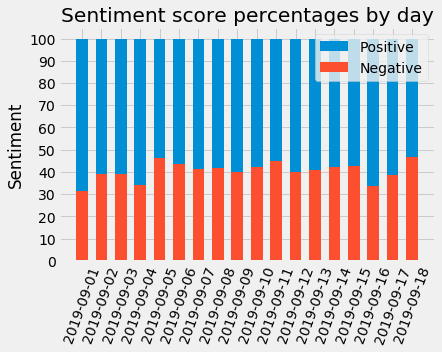

In [103]:
ind = np.arange(browns.shape[0])    # the x locations for the groups
width = 0.60       # the width of the bars: can also be len(x) sequence
p1 = plt.bar(ind, browns.pos, width, bottom=browns.neg)
p2 = plt.bar(ind, browns.neg, width)
pl
plt.ylabel('Sentiment')
plt.title('Sentiment score percentages by day')
plt.xticks(ind, browns.date, rotation=70)
plt.yticks(np.arange(0, 110, 10))
plt.legend((p1[0], p2[0]), ('Positive', 'Negative'))

plt.show();

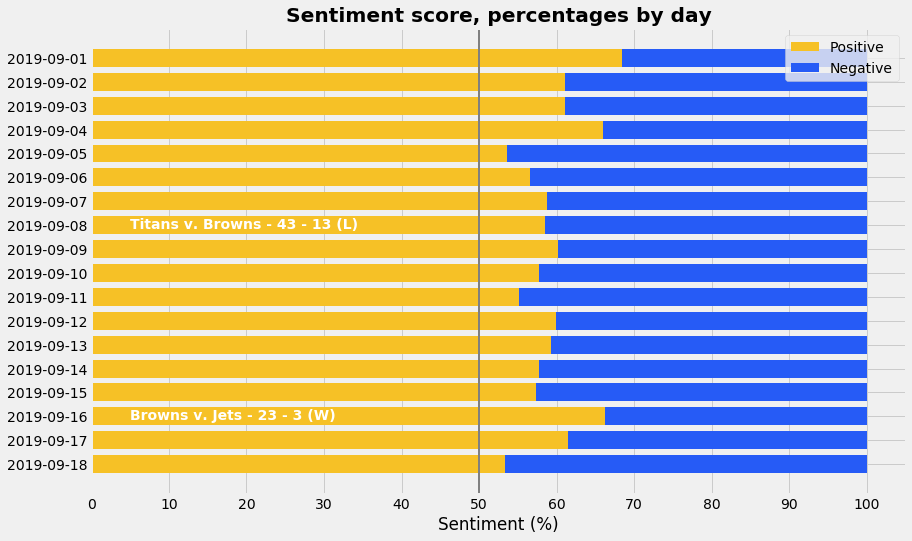

In [189]:
ind = np.arange(browns.shape[0])    # the x locations for the groups
width = 0.75      # the width of the bars: can also be len(x) sequence

plt.figure(figsize=(13,8))
p1 = plt.barh(ind, browns.pos[::-1], width, color='#f6c126')
p2 = plt.barh(ind, browns.neg[::-1], width, color='#265bf6', left=browns.pos[::-1])

# clrs = ['grey' if (x < max(values)) else 'red' for x in values ]
# '2019-09-08'
# '2019-09-16'

plt.xlabel('Sentiment (%)')
plt.title('Sentiment score, percentages by day', weight='bold')
plt.xticks(np.arange(0, 110, 10))
plt.yticks(ind, browns.date[::-1])
plt.legend((p1[0], p2[0]), ('Positive', 'Negative'))
plt.axvline(50, linewidth=2, color='grey')
plt.text(5,9.85, "Titans v. Browns - 43 - 13 (L)", color='white', weight='bold')
plt.text(5,1.85, "Browns v. Jets - 23 - 3 (W)", color='white', weight='bold')
plt.savefig('browns_stats.png')